In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("HousePricePrediction.csv")

In [4]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
828,828,60,RL,28698,CulDSac,1Fam,5,1967,1967,Plywood,764.0,1013.0,185000.0
1906,1906,20,RL,17500,Corner,1Fam,5,1954,1954,HdBoard,435.0,1310.0,NaN
1441,1441,120,RM,4426,Inside,TwnhsE,5,2004,2004,VinylSd,0.0,848.0,149300.0
1076,1076,50,RL,10800,Inside,1Fam,8,1936,1989,Wd Sdng,0.0,796.0,170000.0
1089,1089,120,FV,3316,Inside,TwnhsE,5,2005,2005,MetalSd,0.0,1247.0,197000.0
779,779,90,RL,10530,Inside,Duplex,5,1977,1977,Plywood,0.0,975.0,135000.0
1560,1560,90,RL,10773,Inside,Duplex,3,1967,1967,Plywood,0.0,1832.0,NaN
1626,1626,60,RL,10179,Corner,1Fam,5,1997,1997,VinylSd,0.0,945.0,NaN
1172,1172,160,FV,4017,Inside,TwnhsE,5,2006,2007,MetalSd,0.0,625.0,171900.0
385,385,120,RL,3182,Inside,TwnhsE,5,2004,2005,VinylSd,0.0,1256.0,192000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [6]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [14]:
# As the count of null or missing values are so less so, we can directly discard those values
# It won't affect the model largely

df.dropna(inplace=True)

In [15]:
# After dropping, there must not be any missing values or null values

df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [21]:
# Now we need to convert the categorical variables to Numeric variables 
# Encoding

cat_colmn = df.select_dtypes(include=["object"])
print(cat_colmn.columns)
print("************"*10)

for col in cat_colmn.columns:
    print(df[col])
    print("************"*5)
    print(df[col].value_counts())
    print("************"*10)

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')
************************************************************************************************************************
0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object
************************************************************
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
************************************************************************************************************************
0       Inside
1          FR2
2       Inside
3       Corner
4          FR2
         ...  
1455    Inside
1456    Inside
1457    Inside
1458    Inside
1459    Inside
Name: LotConfig, Length: 1460, dtype: object
************************************************************
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2         

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

le = LabelEncoder()
ohe = OneHotEncoder(
    drop="first",
    sparse_output=False,
    handle_unknown="ignore"
)

In [54]:
# Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')

df['MSZoning'].value_counts()

MSZoning
3    1151
4     218
1      65
2      16
0      10
Name: count, dtype: int64

In [55]:
df['MSZoning'] = le.fit_transform(df['MSZoning'])
df['MSZoning'].value_counts()

MSZoning
3    1151
4     218
1      65
2      16
0      10
Name: count, dtype: int64

In [56]:
df['LotConfig'].value_counts()
df['LotConfig'] = le.fit_transform(df['LotConfig'])
df['LotConfig'].value_counts()

LotConfig
4    1052
0     263
1      94
2      47
3       4
Name: count, dtype: int64

In [57]:
df['BldgType'].value_counts()

df['BldgType'] = le.fit_transform(df['BldgType'])
df['BldgType'].value_counts()

BldgType
0    1220
4     114
2      52
3      43
1      31
Name: count, dtype: int64

In [58]:
df['Exterior1st'].value_counts()

df['Exterior1st'] = le.fit_transform(df['Exterior1st'])
df['Exterior1st'].value_counts()

Exterior1st
12    515
6     222
8     220
13    206
9     108
5      61
3      50
14     26
11     25
0      20
2       2
10      2
1       1
7       1
4       1
Name: count, dtype: int64

In [59]:
# So, post encoding, there must not be any Categorical features.
# All must be Numeric features

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   int64  
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   int64  
 5   BldgType      1460 non-null   int64  
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   int64  
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 192.0 KB


In [60]:
# Let's create the correlation matrix for all the features
# 1st get all the numric features from the dataset
num_col = df.select_dtypes(include="number")

# Then get the correlation matric out of it
corr_matrix = num_col.corr()
corr_matrix

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.011156,-0.006096,-0.033226,0.049756,0.021912,0.012609,-0.012713,-0.021998,-0.034694,-0.005968,-0.015415,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.139781,0.075910,0.746063,-0.059316,0.027850,0.040581,-0.089159,-0.065649,-0.238518,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.034452,-0.009895,0.005690,0.186951,-0.308908,-0.174728,-0.008558,0.028086,-0.087834,-0.166872
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.121161,-0.205721,-0.005636,0.014228,0.013788,0.004256,0.111170,0.260833,0.263843
LotConfig,0.049756,0.075910,-0.009895,-0.121161,1.000000,0.107229,-0.030788,0.013629,-0.005161,0.023316,-0.010357,-0.040049,-0.067396
BldgType,0.021912,0.746063,0.005690,-0.205721,0.107229,1.000000,-0.162040,0.217584,0.104855,-0.112112,-0.017376,-0.050033,-0.085591
OverallCond,0.012609,-0.059316,0.186951,-0.005636,-0.030788,-0.162040,1.000000,-0.375983,0.073741,-0.041165,0.040229,-0.171098,-0.077856
YearBuilt,-0.012713,0.027850,-0.308908,0.014228,0.013629,0.217584,-0.375983,1.000000,0.592855,0.097253,-0.049107,0.391452,0.522897
YearRemodAdd,-0.021998,0.040581,-0.174728,0.013788,-0.005161,0.104855,0.073741,0.592855,1.000000,0.239740,-0.067759,0.291066,0.507101
Exterior1st,-0.034694,-0.089159,-0.008558,0.004256,0.023316,-0.112112,-0.041165,0.097253,0.239740,1.000000,-0.054684,0.046444,0.103551


In [61]:
# Actually we need to check what is the correlation with the output feature with all the other features

num_col.corr()["SalePrice"].sort_values(ascending = False)

SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
Exterior1st     0.103551
BsmtFinSF2     -0.011378
Id             -0.021917
LotConfig      -0.067396
OverallCond    -0.077856
MSSubClass     -0.084284
BldgType       -0.085591
MSZoning       -0.166872
Name: SalePrice, dtype: float64

<Axes: >

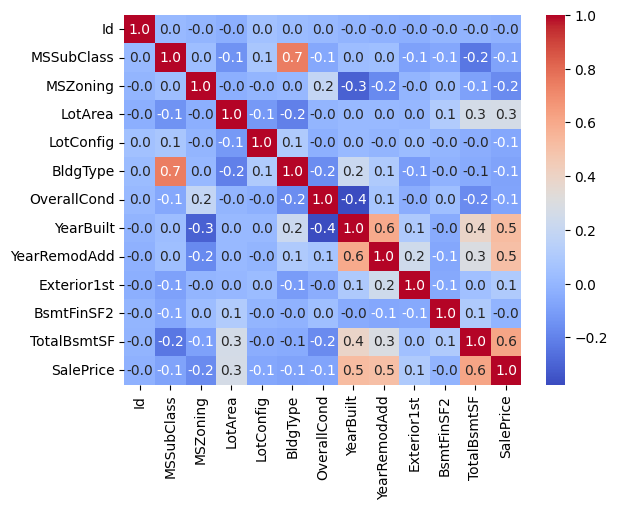

In [62]:
import seaborn as sns

sns.heatmap(
    corr_matrix,
    annot= True,
    fmt = ".1f",
    cmap="coolwarm"
)

In [63]:
df.drop("Id", axis=1)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,4,0,5,1999,2000,12,0.0,953.0,175000.0
1456,20,3,13175,4,0,6,1978,1988,9,163.0,1542.0,210000.0
1457,70,3,9042,4,0,9,1941,2006,5,0.0,1152.0,266500.0
1458,20,3,9717,4,0,6,1950,1996,8,1029.0,1078.0,142125.0


In [66]:
X = df.drop("SalePrice", axis =1 )
X

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0
1,1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0
2,2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0
3,3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0
4,4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,3,7917,4,0,5,1999,2000,12,0.0,953.0
1456,1456,20,3,13175,4,0,6,1978,1988,9,163.0,1542.0
1457,1457,70,3,9042,4,0,9,1941,2006,5,0.0,1152.0
1458,1458,20,3,9717,4,0,6,1950,1996,8,1029.0,1078.0


In [67]:
y = df["SalePrice"]
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [70]:
# Now we need to do feature Scalling to make the values within a range

scaler = StandardScaler()

# Now let's split the dataset into train - test set
from sklearn.model_selection import train_test_split

# Suppose you have features X and target y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% data for testing
    random_state=42,    # ensures reproducibility
    shuffle=True        # shuffle before splitting
)

# Now standardize the data
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)


In [71]:
# Now make the model 
# 1. Import the model
from sklearn.linear_model import LinearRegression

# 4. Initialize and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scalled, y_train)

# 5. Make predictions
y_pred = lin_reg.predict(X_test_scalled)


In [72]:
y_pred

array([193484.70630346, 250932.44270064, 110902.05017329, 139264.74467713,
       263124.38737084, 110356.49971341, 182011.50769351, 153349.46911997,
       127455.03464624, 144602.78883517, 114944.92537618, 144939.85092399,
       116990.24257542, 246661.31791035, 210616.31049837, 179234.52688539,
       209112.08809924, 179773.61398162, 102761.83447937, 239793.25940553,
       167983.04466786, 215682.71762845, 204150.73518911, 165700.70496652,
       230654.64821125, 168680.10514838, 235926.1566812 , 120711.12791561,
       209869.58358791, 206622.25713181, 111799.68021104, 223406.43957468,
       222287.03326547, 135085.85409881, 262829.52717107, 160851.32832403,
       166986.72899345, 209142.11319344, 250009.6431083 ,  51124.29527755,
       107551.26205706, 209346.33097228, 147309.30234546, 297760.19287442,
       137550.78502442,  86612.24125825, 126801.29663686, 150954.39712195,
       293041.8032873 , 140267.34504684, 119274.04706991, 209637.84346451,
        85282.17087836, 2

In [73]:
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error:", mse) 
print("R² Score:", r2)

Mean Squared Error: 2976151532.2031717
R² Score: 0.6119915305017267


In [74]:
# Adjusted R² 
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0] 
p = X_test.shape[1] 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) 
print("R²:", r2) 
print("Adjusted R²:", adj_r2)

R²: 0.6119915305017267
Adjusted R²: 0.5953029941792203


In [75]:
# From heatmap we see the correlated features are :
# Let's include only the related features and exclude the other features:

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')